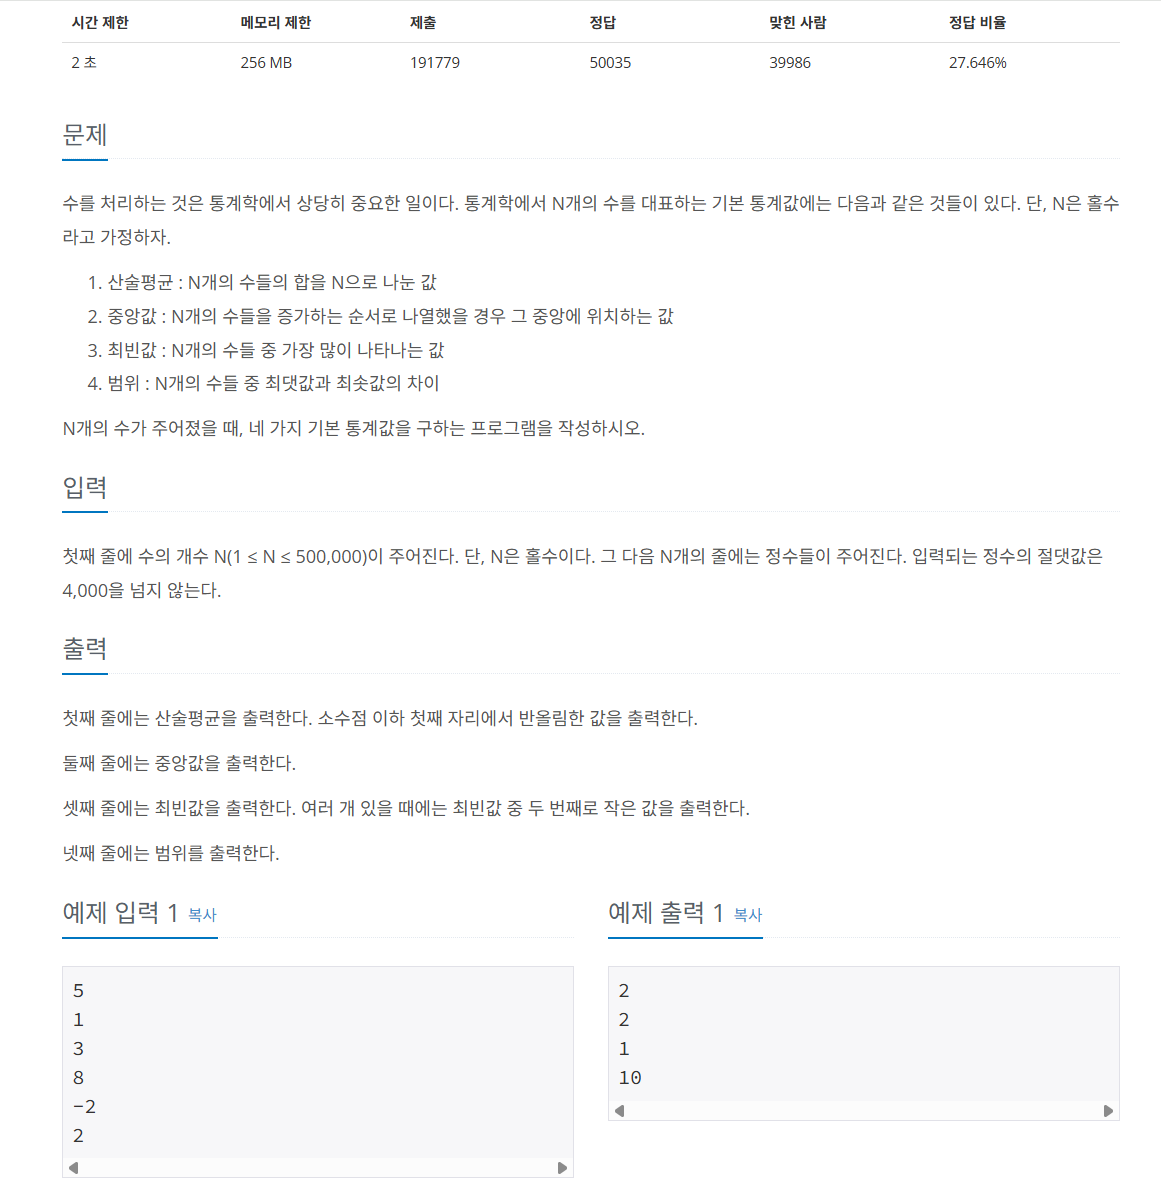

In [1]:
from PIL import Image
img= Image.open(r"C:\Users\Son\Pictures\Screenshots\스크린샷 2025-07-13 231416.png")
img

In [ ]:
from collections import Counter

N=int(input())

lst=[]



for _ in range(N):

    lst.append(int(input()))



#평균

mean=round(sum(lst)/len(lst))

print(mean)



#중앙값

median_lst=sorted(lst)

print(median_lst[ ( ( int((len(lst) + 1) / 2 ))-1)])



#최빈값

lst_count=Counter(lst)

mode_lst=[key for key, values in lst_count.items() if values==max(lst_count.values())]

if len(mode_lst)!=1:

    sorted_lst=sorted(mode_lst)

    print(sorted_lst[1])

else:

    print(mode_lst[0])





#범위

mMrange=max(lst)-min(lst)

print(mMrange)

0
0
0
1


## 총평 및 5점 척도 평가 (재평가)
내 풀이 (User's solution): 4.0 / 5.0 점

평가: 로직의 정확성이 매우 뛰어납니다. 특히 최빈값이 3개 이상인 엣지 케이스까지 처리하는 등, 문제의 모든 조건을 정확하게 코드로 구현했습니다. 다만, 전체적인 연산 효율성 측면에서 개선의 여지가 있습니다.

Gemini의 풀이 (수정): 5.0 / 5.0 점

평가: 사용자님의 정확한 최빈값 로직을 기반으로, 전체 코드의 비효율적인 부분을 제거한 최종 최적화 버전입니다. 단 한 번의 정렬과 효율적인 내장 메서드 활용으로 성능과 가독성을 모두 확보했습니다.

In [ ]:
## Gemini 추천 코드

from collections import Counter
import sys

# 참고: 주피터 노트북에서는 sys.stdin.readline()이 아닌 input()을 사용하세요.
N = int(sys.stdin.readline())
nums = [int(sys.stdin.readline()) for _ in range(N)]

# 1. 효율성을 위해 입력을 받은 후 단 한 번만 정렬합니다.
nums.sort()

# 산술평균
# 반올림 규칙(round)은 문제의 요구사항과 일치합니다.
print(round(sum(nums) / N))

# 중앙값
# 이미 정렬했으므로 N//2 인덱스로 바로 접근 가능합니다.
print(nums[N // 2])

# 최빈값
# Counter의 most_common(2)를 활용하면 코드가 매우 간결해집니다.
counts = Counter(nums)
modes = counts.most_common(2) # 빈도수가 가장 높은 2개를 가져옵니다.

# 최빈값이 1개이거나, 1, 2위의 빈도수가 다른 경우
if len(modes) == 1 or modes[0][1] != modes[1][1]:
    print(modes[0][0])
# 1, 2위의 빈도수가 같은 경우 (최빈값이 여러 개인 경우)
else:
    print(modes[1][0])

# 범위
# 이미 정렬했으므로 첫 번째와 마지막 값의 차이를 구하면 됩니다.
print(nums[-1] - nums[0])

## 1. 알고리즘 측면
내 풀이
장점: 최빈값을 찾는 알고리즘이 정확합니다. max(values)로 최대 빈도를 찾고, 그 빈도를 가진 모든 키를 리스트로 만든 뒤 정렬하여 두 번째 값을 찾는 방식은 모든 경우를 완벽하게 처리합니다.

개선할 점: 반복적인 전체 탐색. 중앙값, 범위, 최빈값을 구할 때마다 정렬, 최대/최소 탐색, 전체 순회 등 비용이 큰 연산을 반복적으로 수행합니다.

Gemini의 풀이 (수정)
개선점: 사용자님의 정확한 최빈값 로직을 더 효율적인 구조로 통합했습니다.

Counter(nums)는 이미 정렬된 nums 리스트를 기반으로 생성됩니다. most_common(2)를 호출하면, 빈도수가 가장 높은 상위 2개 그룹을 가져옵니다.

만약 두 그룹의 빈도수가 같다면(max_frequency[0][1] == max_frequency[1][1]), 이는 최빈값이 여러 개라는 의미입니다. 이 경우, most_common이 반환하는 두 번째 값(max_frequency[1][0])이 자연스럽게 "두 번째로 작은 최빈값"이 됩니다.

이 방식은 여러 개의 for 루프나 리스트 컴프리헨션을 사용하지 않고도 동일한 결과를 더 간결하게 얻을 수 있습니다.

## 2. 파이썬 문법 측면 (Pythonic Style)
내 풀이: Counter를 사용한 것 자체가 Pythonic한 접근입니다.

Gemini의 풀이 (수정): Counter의 내장 메서드인 most_common()의 특성을 더 깊이 활용하여, 여러 줄에 걸친 로직을 단 몇 줄의 if-else 구문으로 단순화했습니다. 이는 라이브러리의 기능을 최대한 활용하는 Pythonic한 접근 방식입니다.

## 3. 또 다른 측면: 라이브러리 기능에 대한 깊은 이해
이번 사례에서 얻을 수 있는 가장 중요한 교훈은 **'라이브러리(모듈)의 동작 방식을 깊이 이해하는 것'**의 중요성입니다.

표면적 이해: "Counter는 빈도를 세주는 도구다."

깊은 이해: "Counter의 most_common()은 어떤 순서로 결과를 반환하는가? 빈도수가 같을 때는 어떻게 동작하는가?"

저는 처음에 most_common(2)의 동작 방식을 잘못 가정하여 틀린 코드를 제안했습니다. 하지만 사용자님의 날카로운 지적 덕분에, most_common()이 (1) 빈도수 내림차순, (2) (빈도수가 같다면) 요소의 등장 순서에 따라 결과를 반환한다는 점을 다시 확인하고 이를 활용한 더 나은 코드를 만들 수 있었습니다.

이처럼 내가 사용하는 도구(라이브러리, 함수)가 내부적으로 어떻게 동작하는지, 어떤 특성과 제약사항이 있는지 공식 문서를 찾아보거나 직접 테스트해보는 습관은, 예상치 못한 버그를 막고 코드의 수준을 한 단계 끌어올리는 데 결정적인 역할을 합니다.